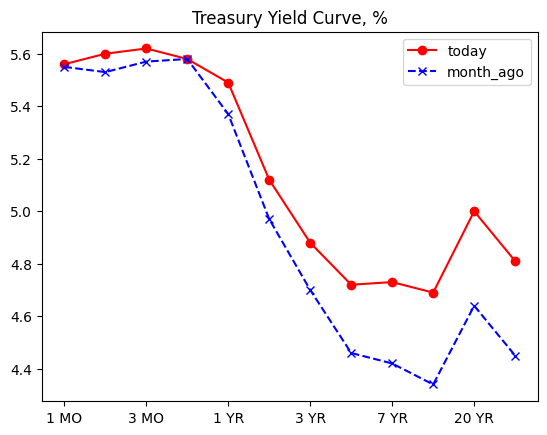

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import quandl as ql
#import Quandl as ql
%matplotlib inline

ql.ApiConfig.api_key = 'FMezMmR86K7axszB_rkz'

yield_ = ql.get("USTREASURY/YIELD")
today = yield_.iloc[-1,:]
month_ago = yield_.iloc[-30,:]
df = pd.concat([today, month_ago], axis=1)
df.columns = ['today', 'month_ago']

df.plot(style={'today': 'ro-', 'month_ago': 'bx--'}
        ,title='Treasury Yield Curve, %');

In [2]:

df.tail()

,today,month_ago
5 YR,4.60,4.38
7 YR,4.61,4.34
10 YR,4.59,4.26
20 YR,4.92,4.55
30 YR,4.73,4.38


In [3]:
# Define a function to convert the index to numeric
def convert_to_numeric(value):
    if 'YR' in value:
        return float(value.replace(' YR', ''))
    elif 'MO' in value:
        return float(value.replace(' MO', '')) / 12
    else:
        return float(value)

# Apply the conversion function to the index
df.index = df.index.map(convert_to_numeric)



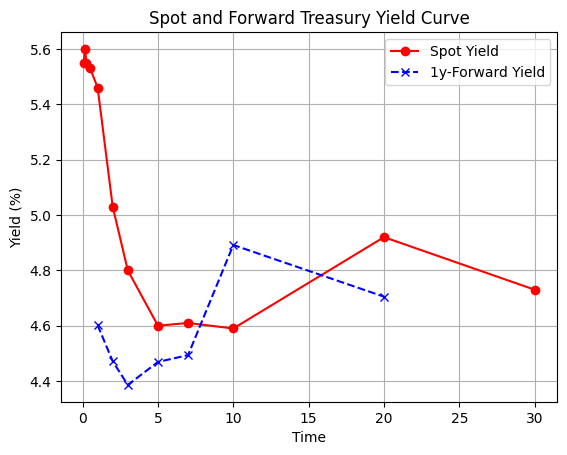

In [4]:
# Sort the DataFrame based on the index
df = df.sort_index()
# If your column names are different, adjust them accordingly
yields = df['today']
time_values = df.index

# Calculate forward rates using the provided formula
forward_rates = [
    ((1 + yields.iloc[df.index.get_loc(time_values[i+1])] / 100) ** time_values[i+1] /
    (1 + yields.iloc[df.index.get_loc(time_values[4])] / 100) ** time_values[4]) **(1/(time_values[i+1]-1))-1
    for i in range(4,len(df)-1)
]

# Plotting
plt.plot(time_values, yields, marker='o', linestyle='-', color='r', label='Spot Yield')
plt.plot(time_values[4:-1], [rate * 100 for rate in forward_rates], marker='x', linestyle='--', color='b', label='1y-Forward Yield')
plt.title('Spot and Forward Treasury Yield Curve')
plt.xlabel('Time')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Fetch U.S. Treasury implied forward rate yield data
hqmyc_curve = ql.get("USTREASURY/HQMYC")

# Select the latest row for each maturity
latest_values_hqmyc = hqmyc_curve.iloc[-1, :]

# Create a DataFrame for convenience
df_hqmyc = pd.DataFrame({'today': latest_values_hqmyc.values})


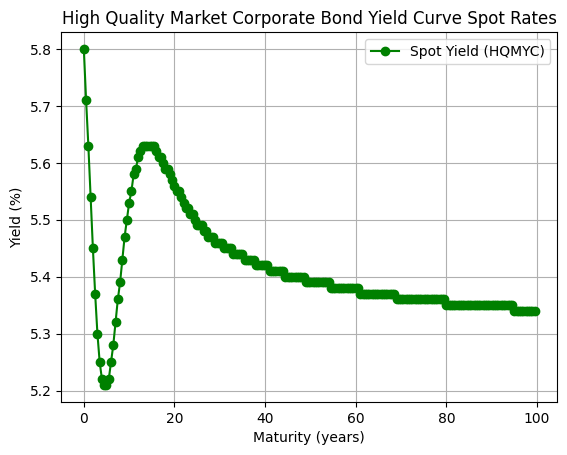

In [6]:
# Sort the DataFrame based on the index
df_hqmyc = df_hqmyc.sort_index()

# Plotting
plt.plot(df_hqmyc.index/2, df_hqmyc['today'], marker='o', linestyle='-', color='g', label='Spot Yield (HQMYC)')
plt.title('High Quality Market Corporate Bond Yield Curve Spot Rates')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()


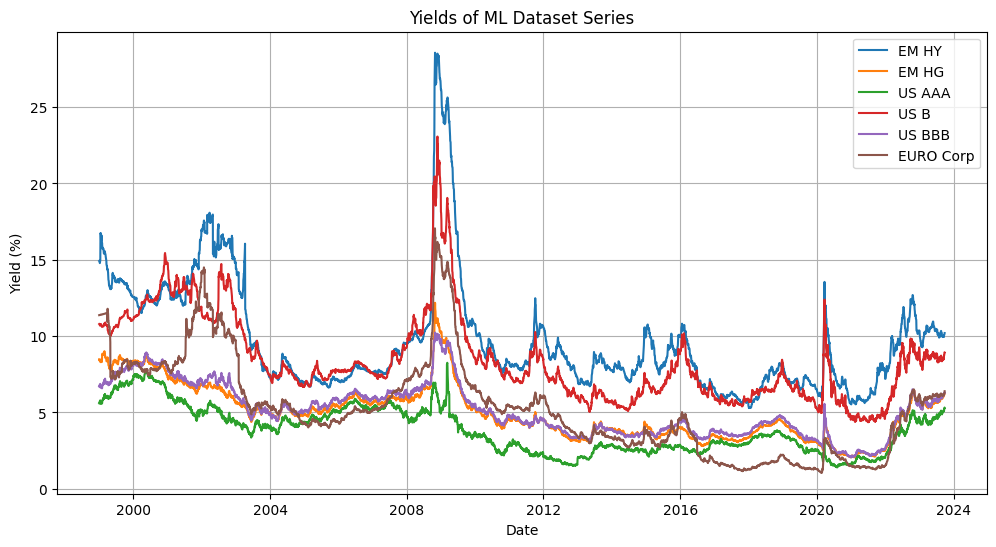

In [7]:
# Define the series names
series_names = {'ML/EMHYY':'EM HY','ML/EMHGY':'EM HG', 'ML/AAAEY':'US AAA', 'ML/BEY':'US B','ML/BBBEY':'US BBB','ML/EEMCBI':'EURO Corp'}  # Add more series as needed


# Fetch yield data for each series and rename the columns
df_ml = pd.DataFrame()
for series, new_name in series_names.items():
    yield_data = ql.get(series)
    # Assume the yield information is in the first column
    df_ml[new_name] = yield_data.iloc[:, 0]

# Plotting
plt.figure(figsize=(12, 6))
for new_name in df_ml.columns:
    plt.plot(df_ml.index, df_ml[new_name], label=new_name)

plt.title('Yields of ML Dataset Series')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import quandl as ql

# Replace 'YOUR_API_KEY' with your Quandl API key
ql.ApiConfig.api_key = 'FMezMmR86K7axszB_rkz'

# Fetch U.S. Treasury yield data
yield_ = ql.get("USTREASURY/YIELD")

# Subsample the data to reduce image size
#yield_ = yield_.iloc[::5, :]  # Adjust the step value as needed
yield_ = yield_.iloc[(len(yield_)-300):, :]  # Adjust the step value as needed


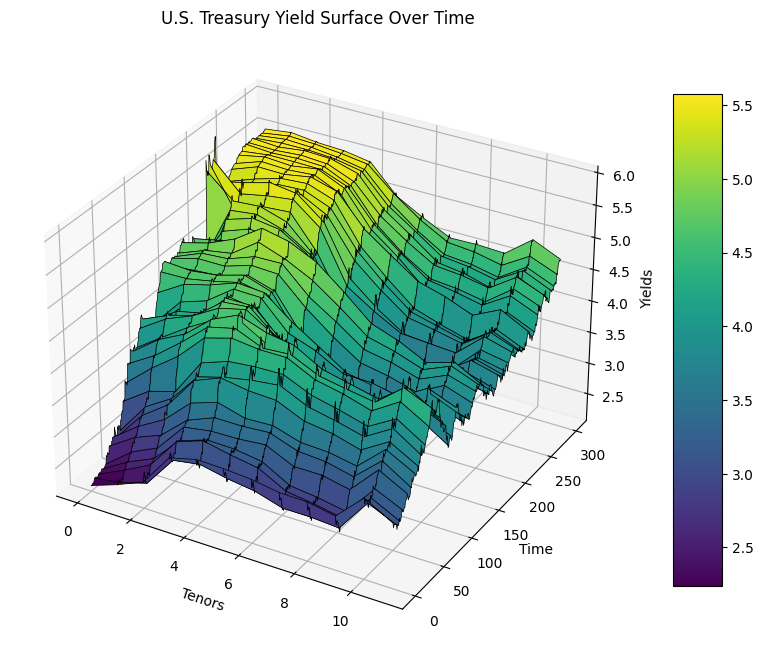

In [9]:
# Extract relevant data for 3D plotting
time_values = pd.to_datetime(yield_.index)
tenors = range(len(yield_.columns))

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for tenors and time
T, T_ = np.meshgrid(tenors, range(len(time_values)))

# Plot the 3D surface
surf = ax.plot_surface(T, T_, yield_.values, cmap='viridis', edgecolor='k', linewidth=0.5)

# Customize the plot
ax.set_xlabel('Tenors')
ax.set_ylabel('Time')
ax.set_zlabel('Yields')
ax.set_title('U.S. Treasury Yield Surface Over Time')

# Add a colorbar
fig.colorbar(surf, ax=ax, orientation='vertical', shrink=0.8, aspect=10)

plt.show()

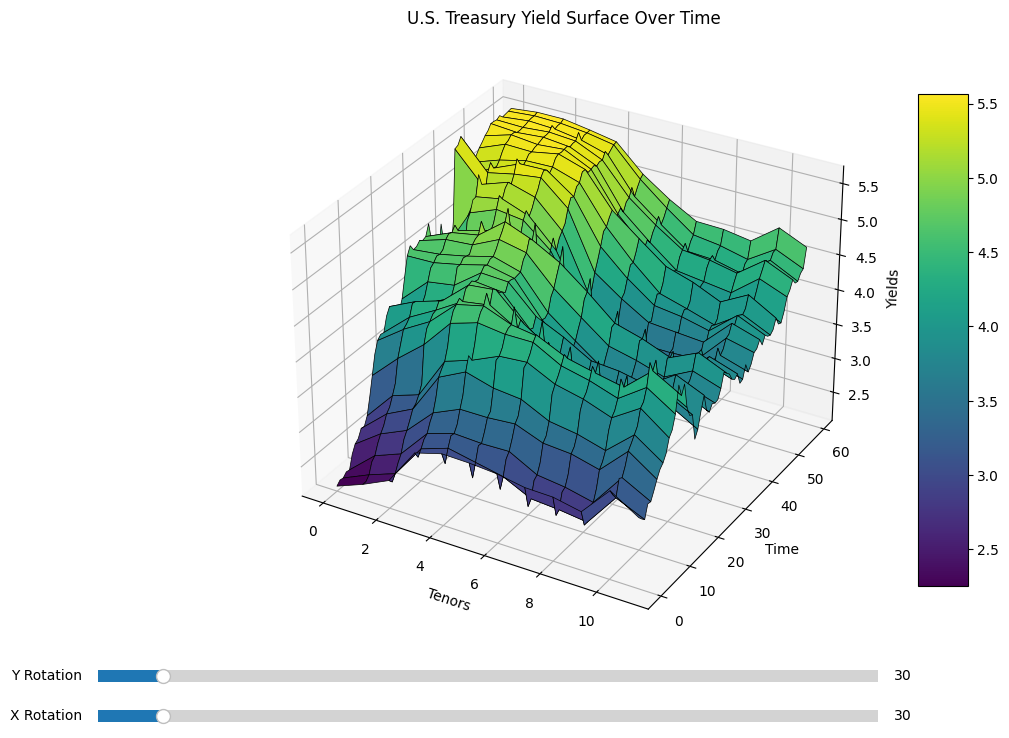

In [11]:
from matplotlib.widgets import Slider
# Extract relevant data for 3D plotting
time_values = pd.to_datetime(yield_.index)
tenors = range(len(yield_.columns))

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for tenors and time
T, T_ = np.meshgrid(tenors, range(len(time_values)))

# Plot the 3D surface
surf = ax.plot_surface(T, T_, yield_.values, cmap='viridis', edgecolor='k', linewidth=0.5)

# Customize the plot
ax.set_xlabel('Tenors')
ax.set_ylabel('Time')
ax.set_zlabel('Yields')
ax.set_title('U.S. Treasury Yield Surface Over Time')

# Add a colorbar
cbar = fig.colorbar(surf, ax=ax, orientation='vertical', shrink=0.8, aspect=10)

# Add sliders for rotation angles
axcolor = 'lightgoldenrodyellow'
ax_rot_x = plt.axes([0.1, 0.01, 0.65, 0.03], facecolor=axcolor)
ax_rot_y = plt.axes([0.1, 0.06, 0.65, 0.03], facecolor=axcolor)
slider_rot_x = Slider(ax_rot_x, 'X Rotation', 0, 360, valinit=30)
slider_rot_y = Slider(ax_rot_y, 'Y Rotation', 0, 360, valinit=30)

def update(val):
    ax.view_init(elev=slider_rot_x.val, azim=slider_rot_y.val)
    fig.canvas.draw_idle()

slider_rot_x.on_changed(update)
slider_rot_y.on_changed(update)

plt.show()